# Ajuste de Hiperparámetros

In [46]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Análisis Exploratorio de Datos EDA

In [48]:
# EDA básico
print(data.head())
print("\nInformación del dataset:")
print(data.info())
print("\nEstadísticas descriptivas:")
print(data.describe())
print("\nValores nulos por columna:")
print(data.isnull().sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glu

In [49]:
# Verificación de valores cero que podrían representar valores faltantes
print("\nConteo de valores cero en columnas donde no tendrían sentido:")
zero_counts = {}
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_counts[col] = (data[col] == 0).sum()
print(zero_counts)


Conteo de valores cero en columnas donde no tendrían sentido:
{'Glucose': np.int64(5), 'BloodPressure': np.int64(35), 'SkinThickness': np.int64(227), 'Insulin': np.int64(374), 'BMI': np.int64(11)}


#### Estadísticas descriptivas

In [50]:
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Número de observaciones: 20,640 registros de viviendas

Variables: 9 características numéricas

Problema de datos faltantes: total_bedrooms tiene solo 20,433 registros (207 valores faltantes)
 
 El dataset de viviendas de California muestra distribuciones asimétricas en la mayoría de variables, evidenciado por medias significativamente mayores que las medianas en total_rooms (2,636 vs 2,127), total_bedrooms (538 vs 435) y population (1,425 vs 1,166), indicando la presencia de valores atípicos extremos como el máximo de 39,220 habitaciones. Las coordenadas geográficas revelan una concentración en el área de Los Ángeles (mediana de longitud -118.49°)




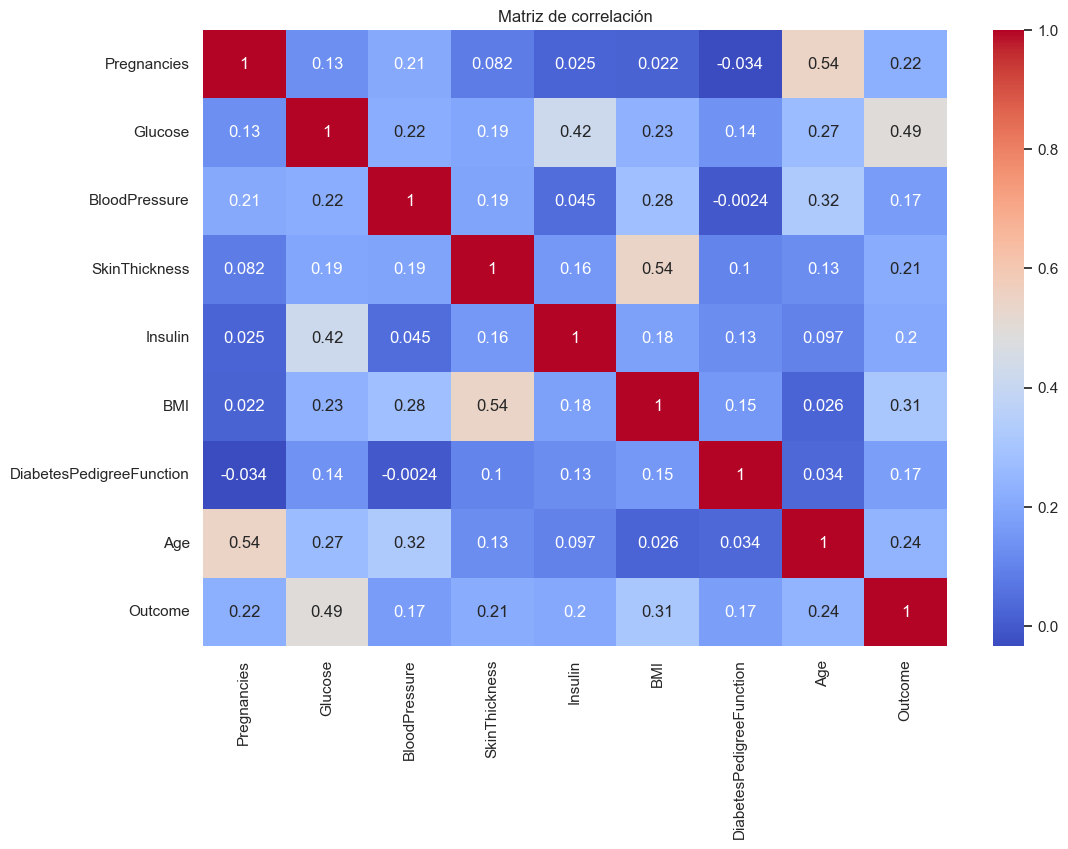

In [ ]:
# Visualizaciones
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

Correlaciones más relevantes

Glucose (0.49): La correlación más fuerte con el diagnóstico de diabetes. Los niveles elevados de glucosa en sangre son un indicador directo de diabetes.

BMI (0.31): El índice de masa corporal muestra una correlación moderada, lo que sugiere que el sobrepeso es un factor de riesgo importante.

Age (0.24): La edad tiene una correlación baja pero significativa, indicando que el riesgo de diabetes aumenta con la edad.

Pregnancies (0.22): El número de embarazos muestra una correlación similar a la edad, posiblemente relacionado con diabetes gestacional.

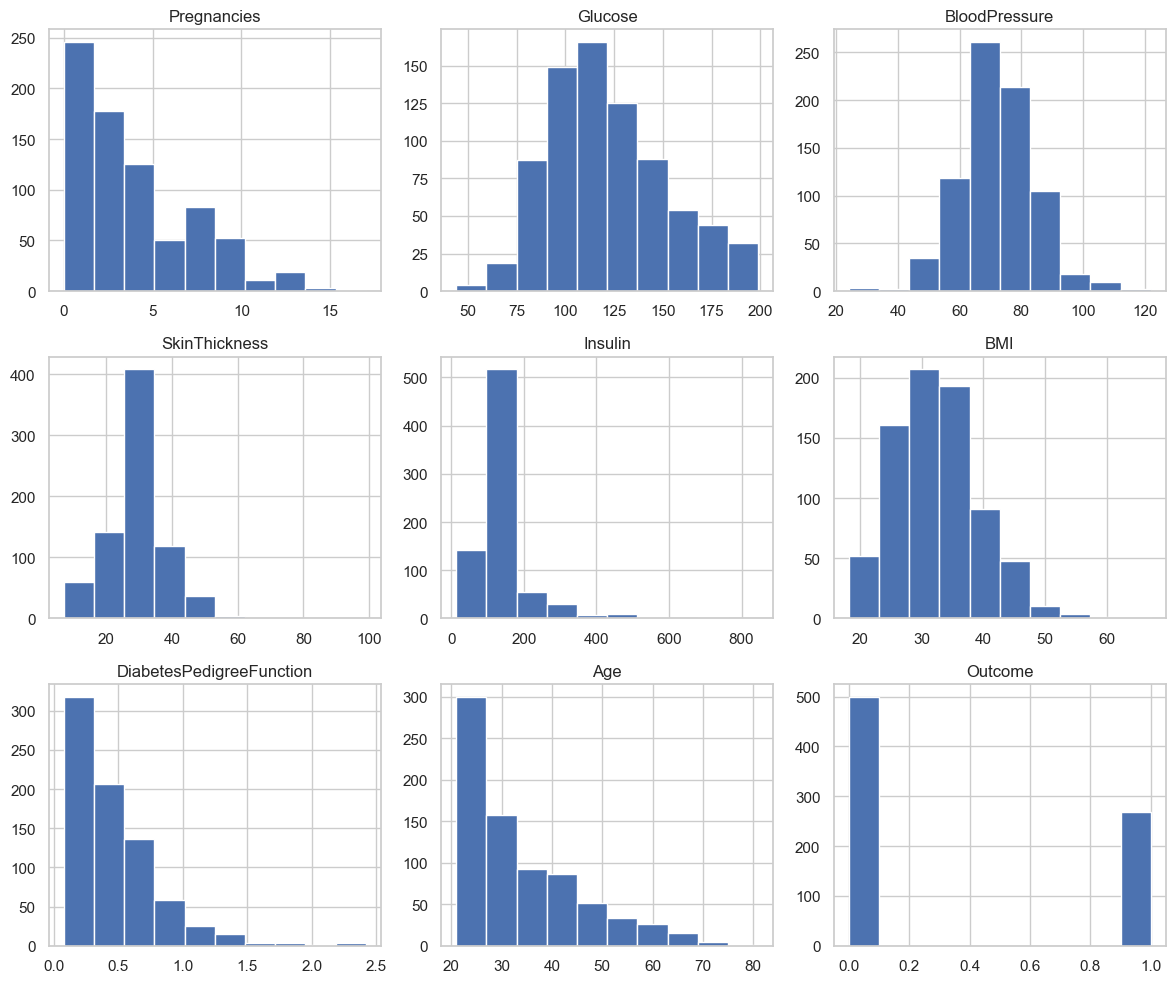

In [52]:
# Histogramas de las características
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

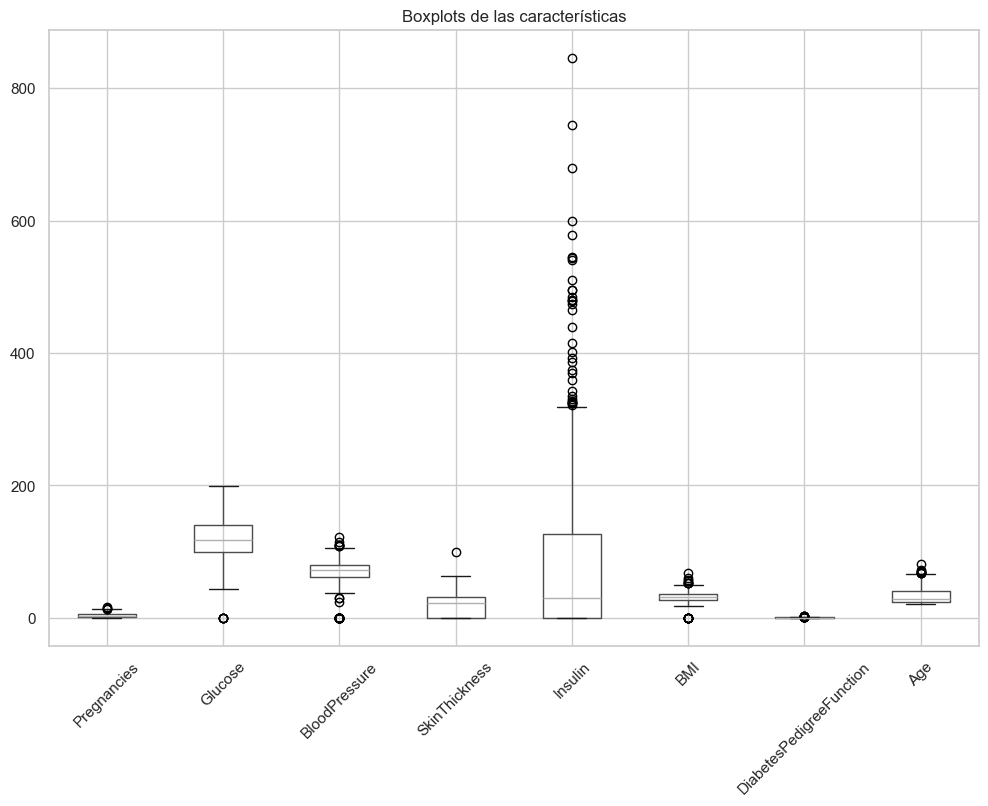

In [53]:
# Boxplots para visualizar outliers
plt.figure(figsize=(12, 8))
data.drop('Outcome', axis=1).boxplot()
plt.title("Boxplots de las características")
plt.xticks(rotation=45)
plt.show()

### Partición del dataset

In [54]:
# Dividir en características (X) y objetivo (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Dividir en train y test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print("\nDistribución de clases en train:", y_train.value_counts(normalize=True))
print("Distribución de clases en test:", y_test.value_counts(normalize=True))

Tamaño del conjunto de entrenamiento: (614, 8)
Tamaño del conjunto de prueba: (154, 8)

Distribución de clases en train: Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64
Distribución de clases en test: Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


### Pipeline de procesamiento

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [57]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Definir las columnas numéricas
numeric_features = X.columns.tolist()

# Pipeline para preprocesamiento numérico
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Reemplazar ceros con la mediana
    ('scaler', StandardScaler())])

# Aplicar el transformador a todas las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Aplicar el preprocesamiento
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [58]:
#Verificar que no hay valores nulos
print("Valores cero después del tratamiento:")
print((data_clean[problem_cols] == 0).sum())

Valores cero después del tratamiento:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [59]:
# Aplicar el preprocesamiento
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Modelo

Usaremos regresión logistica como modelo baseline

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

In [63]:
# Modelo baseline
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train_processed, y_train)

# Evaluación en train con CV
baseline_cv_scores = cross_val_score(baseline_model, X_train_processed, y_train, 
                                    cv=5, scoring='roc_auc')

print(f"Baseline model CV ROC-AUC: {np.mean(baseline_cv_scores):.4f} (±{np.std(baseline_cv_scores):.4f})")

Baseline model CV ROC-AUC: 0.8316 (±0.0290)


### Espacio de hiperparámetros

In [64]:
# Espacio de hiperparámetros para Random Forest
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None]
}

### Ajuste de hiperparámetros

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [70]:
# Modelo base
rf = RandomForestClassifier(random_state=42)

# Búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_processed, y_train)

print("Mejores parámetros (búsqueda aleatoria):", random_search.best_params_)
print(f"Mejor puntuación ROC-AUC (búsqueda aleatoria): {random_search.best_score_:.4f}")

Mejores parámetros (búsqueda aleatoria): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}
Mejor puntuación ROC-AUC (búsqueda aleatoria): 0.8343


### Optimización Bayesiana

In [73]:
!pip install optuna


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }
    
    model = RandomForestClassifier(**params, random_state=42)
    score = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='roc_auc').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Mejores parámetros (Optuna):", study.best_params)
print(f"Mejor puntuación ROC-AUC (Optuna): {study.best_value:.4f}")

# Entrenar el mejor modelo encontrado por Optuna
best_rf_optuna = RandomForestClassifier(**study.best_params, random_state=42)
best_rf_optuna.fit(X_train_processed, y_train)

[I 2025-05-29 23:14:55,457] A new study created in memory with name: no-name-1fd3087a-d73e-4ba1-965e-b10868a38a34
[I 2025-05-29 23:15:00,630] Trial 0 finished with value: 0.824357696566999 and parameters: {'n_estimators': 461, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 2, 'bootstrap': True, 'max_features': 'log2'}. Best is trial 0 with value: 0.824357696566999.
[I 2025-05-29 23:15:03,957] Trial 1 finished with value: 0.8147466777408638 and parameters: {'n_estimators': 304, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 2, 'bootstrap': False, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.824357696566999.
[I 2025-05-29 23:15:09,373] Trial 2 finished with value: 0.823265503875969 and parameters: {'n_estimators': 283, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 1, 'bootstrap': True, 'max_features': None}. Best is trial 0 with value: 0.824357696566999.
[I 2025-05-29 23:15:11,963] Trial 3 finished with value: 0.8147743632336655 and pa

Mejores parámetros (Optuna): {'n_estimators': 420, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 4, 'bootstrap': True, 'max_features': None}
Mejor puntuación ROC-AUC (Optuna): 0.8313


RandomForestClassifier(max_depth=4, max_features=None, min_samples_leaf=4,
                       min_samples_split=8, n_estimators=420, random_state=42)

### Comparación 

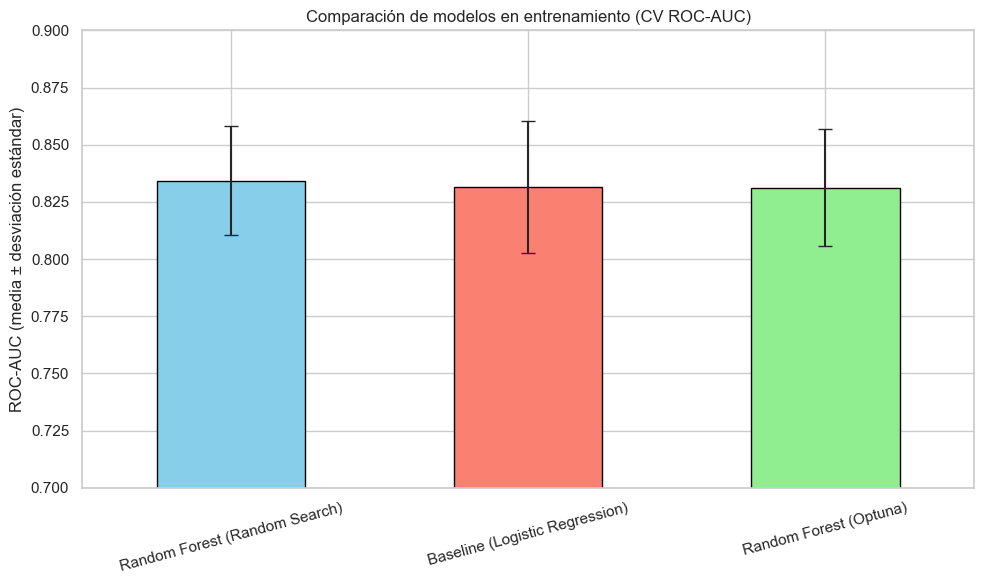

In [77]:
plt.figure(figsize=(10, 6))
results_df['mean_roc_auc'].plot(
    kind='bar',
    yerr=results_df['std_roc_auc'],
    capsize=5,
    color=['skyblue', 'salmon', 'lightgreen'],
    edgecolor='black'
)
plt.title("Comparación de modelos en entrenamiento (CV ROC-AUC)")
plt.ylim(0.7, 0.9)
plt.ylabel("ROC-AUC (media ± desviación estándar)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Regresión Logística: ROC-AUC en test = 0.8230
Random Forest (RandomSearch): ROC-AUC en test = 0.8120
Random Forest (Optuna): ROC-AUC en test = 0.8150


C:\Users\angel\AppData\Local\Temp\ipykernel_32628\2228689111.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


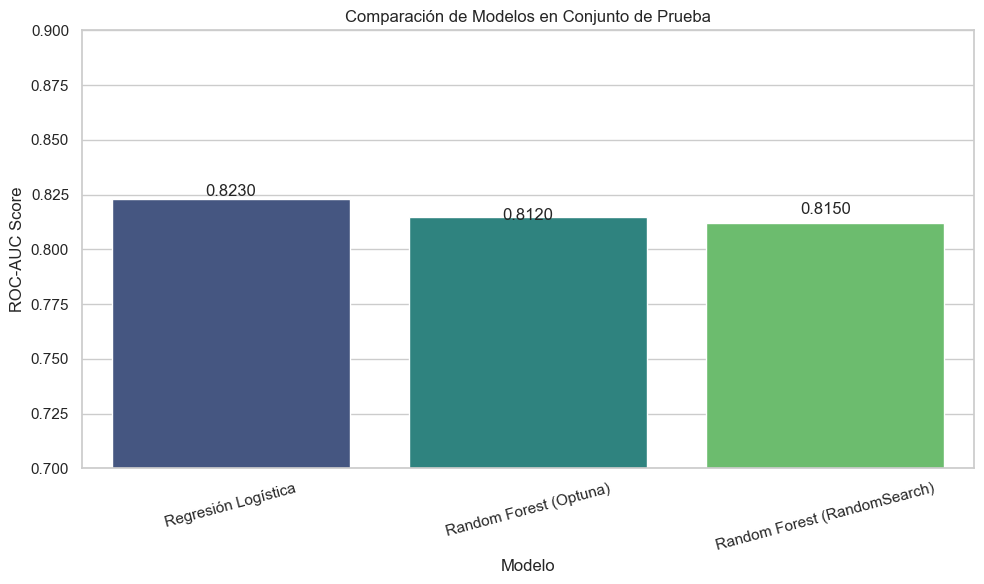

In [84]:
# Importar la métrica necesaria
from sklearn.metrics import roc_auc_score

# Evaluar en el conjunto de prueba
test_results = {}
for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test_processed)[:, 1]  # Probabilidades de la clase positiva
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    test_results[name] = roc_auc
    print(f"{name}: ROC-AUC en test = {roc_auc:.4f}")

# Visualización
test_results_df = pd.DataFrame.from_dict(test_results, orient='index', columns=['Test ROC-AUC'])
test_results_df = test_results_df.reset_index().rename(columns={'index': 'Modelo'})

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Modelo',
    y='Test ROC-AUC',
    data=test_results_df,
    palette='viridis',
    order=test_results_df.sort_values('Test ROC-AUC', ascending=False)['Modelo']
)

# Añadir valores numéricos sobre las barras
for index, row in test_results_df.iterrows():
    plt.text(index, row['Test ROC-AUC'], f"{row['Test ROC-AUC']:.4f}", 
             ha='center', va='bottom')

plt.title("Comparación de Modelos en Conjunto de Prueba")
plt.ylim(0.7, 0.9)
plt.ylabel("ROC-AUC Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Conclusiones